In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("hdfc_index_fund_-_bse_sensex_plan_-_direct_plan.csv")

In [3]:
NAV=df[['nav']]

In [4]:
NAV.head()

,nav
0,163.6338
1,164.7386
2,165.1558
3,165.3131
4,164.5376


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(NAV)
scaled_data

array([[0.0184736 ],
       [0.02015772],
       [0.02079368],
       ...,
       [0.97742693],
       [0.95205696],
       [0.94046022]])

In [6]:
scaled_data.shape

(2894, 1)

In [69]:
moving_avg_len=7

In [70]:
x_data = []
y_data = []

for i in range(moving_avg_len, len(scaled_data)):
    x_data.append(scaled_data[i-moving_avg_len:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [71]:
x_data[0],y_data[0]

(array([[0.0184736 ],
        [0.02015772],
        [0.02079368],
        [0.02103346],
        [0.01985132],
        [0.02048591],
        [0.01952556]]),
 array([0.01947938]))

In [72]:
train_len=int(len(x_data)*0.7)

In [73]:
test_len=scaled_data.shape[0]-moving_avg_len-train_len

In [74]:
scaled_data.shape, train_len, test_len

((2894, 1), 2020, 867)

In [75]:
x_train = x_data[:train_len]
y_train = y_data[:train_len]

x_test = x_data[train_len:]
y_test = y_data[train_len:]

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2020, 7, 1)
(2020, 1)
(867, 7, 1)
(867, 1)


In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [78]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [79]:
print("GPU Available: ", tf.test.is_gpu_available())
print("Current Device:", tf.test.gpu_device_name())

GPU Available:  True
Current Device: /device:GPU:0


I0000 00:00:1728140620.517984  116889 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728140620.518160  116889 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728140620.518235  116889 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728140620.518345  116889 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [80]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.0334e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5921e-04


In [83]:
model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_86 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_87 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [84]:
predictions = model.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [85]:
predictions

array([[0.44454497],
       [0.4481048 ],
       [0.44816816],
       [0.4499368 ],
       [0.44800168],
       [0.44714397],
       [0.44877803],
       [0.4500482 ],
       [0.44967836],
       [0.44350535],
       [0.44063637],
       [0.44021416],
       [0.43992823],
       [0.43610483],
       [0.4320504 ],
       [0.4304321 ],
       [0.42966765],
       [0.43040466],
       [0.4328825 ],
       [0.43763632],
       [0.4420234 ],
       [0.44192797],
       [0.44132328],
       [0.43943137],
       [0.43923032],
       [0.43976152],
       [0.44054046],
       [0.44211835],
       [0.44273257],
       [0.44150674],
       [0.44100744],
       [0.44352677],
       [0.44761524],
       [0.44950905],
       [0.4494028 ],
       [0.45309877],
       [0.45686275],
       [0.45972234],
       [0.46269807],
       [0.46500635],
       [0.46812245],
       [0.47296554],
       [0.47610825],
       [0.47811437],
       [0.481115  ],
       [0.48277134],
       [0.48481035],
       [0.486

In [86]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[443.14166],
       [445.47696],
       [445.51852],
       [446.67877],
       [445.4093 ],
       [444.84665],
       [445.9186 ],
       [446.75186],
       [446.50922],
       [442.45966],
       [440.57755],
       [440.3006 ],
       [440.11304],
       [437.60483],
       [434.94507],
       [433.88345],
       [433.38196],
       [433.86545],
       [435.49094],
       [438.6095 ],
       [441.4875 ],
       [441.42487],
       [441.0282 ],
       [439.78708],
       [439.65518],
       [440.00366],
       [440.51465],
       [441.54977],
       [441.9527 ],
       [441.14856],
       [440.82098],
       [442.4737 ],
       [445.15576],
       [446.39813],
       [446.32846],
       [448.75305],
       [451.22226],
       [453.0982 ],
       [455.0503 ],
       [456.56458],
       [458.60876],
       [461.7859 ],
       [463.84753],
       [465.16357],
       [467.13202],
       [468.2186 ],
       [469.55624],
       [470.36005],
       [469.90234],
       [470.5305 ],


In [87]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[455.1646],
       [449.4653],
       [454.1937],
       [446.2817],
       [446.6537],
       [450.833 ],
       [451.5991],
       [450.1905],
       [434.6668],
       [440.6587],
       [443.0016],
       [443.2557],
       [435.2337],
       [433.0181],
       [436.4164],
       [434.5761],
       [439.1826],
       [444.2418],
       [451.4124],
       [451.7575],
       [442.8248],
       [442.2383],
       [438.0175],
       [441.8629],
       [444.3283],
       [446.6487],
       [449.327 ],
       [446.233 ],
       [441.9549],
       [442.3305],
       [450.0161],
       [455.57  ],
       [452.9386],
       [449.8695],
       [458.7247],
       [459.7258],
       [459.7212],
       [463.1749],
       [464.0587],
       [466.8443],
       [472.3091],
       [472.2824],
       [471.5034],
       [475.1003],
       [473.8946],
       [475.9623],
       [475.4786],
       [472.4447],
       [476.1696],
       [477.9368],
       [478.7544],
       [480.7628],
       [478.

In [88]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [89]:
rmse

13.499761164169128

# Rendom experiments below

In [60]:
def fun(moving_avg_len,NAV,epoch=2,plot=False):

    import numpy as np
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(NAV)
    scaled_data

    x_data = []
    y_data = []

    for i in range(moving_avg_len, len(scaled_data)):
        x_data.append(scaled_data[i-moving_avg_len:i])
        y_data.append(scaled_data[i])
        
    x_data, y_data = np.array(x_data), np.array(y_data)

    train_len=int(len(x_data)*0.7)
    test_len=scaled_data.shape[0]-moving_avg_len-train_len

    x_train = x_data[:train_len]
    y_train = y_data[:train_len]

    x_test = x_data[train_len:]
    y_test = y_data[train_len:]

    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(64,return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs = epoch)
    model.summary()
    predictions = model.predict(x_test)

    inv_predictions = scaler.inverse_transform(predictions)
    inv_y_test = scaler.inverse_transform(y_test)
    if plot:
        plt.plot(inv_y_test, label="List2 vs List1")
        plt.plot(inv_predictions, label="List2 vs List1")
        print("Test")
        print(inv_y_test[-5:])
        print("Pred")
        print(inv_predictions[-5:])

    rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
    
    
    return rmse

In [29]:
results={}
for i in [300,250,200,150,100,50,25,10,5,4,3,2]:
    rmse=fun(moving_avg_len,NAV)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0018
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9607e-04


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 300 	RMSE 31.990069278636053
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0010
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6733e-04


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 250 	RMSE 9.732520610947413
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0012
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5714e-04


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 200 	RMSE 8.640182919570842
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0010
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3328e-04


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 150 	RMSE 8.950640748024101
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0015
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5578e-04


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 100 	RMSE 21.217358959215982
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0014
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5875e-04


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 50 	RMSE 15.568420932022086
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5388e-04


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 25 	RMSE 13.411408947683746
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0015
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3164e-04


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 10 	RMSE 28.658381762716342
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5250e-04


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 5 	RMSE 15.2412754877977
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0025
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5317e-04


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 4 	RMSE 38.18681505815459
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0016
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7166e-04


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 3 	RMSE 28.52578239437083
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0014
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9391e-04


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 2 	RMSE 10.348080034823735


In [30]:
import pprint

In [32]:
pprint.pprint(results)

{2: 10.348080034823735,
 3: 28.52578239437083,
 4: 38.18681505815459,
 5: 15.2412754877977,
 10: 28.658381762716342,
 25: 13.411408947683746,
 50: 15.568420932022086,
 100: 21.217358959215982,
 150: 8.950640748024101,
 200: 8.640182919570842,
 250: 9.732520610947413,
 300: 31.990069278636053}


In [36]:
ma_range=[i for i in range(100,250,10)]
ma_range

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]

In [37]:
results={}
for i in ma_range:
    rmse=fun(moving_avg_len,NAV)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0019
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2204e-04


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 100 	RMSE 11.903099222398163
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0018
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6840e-04


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 110 	RMSE 20.299758181111624
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0014
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3835e-04


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 120 	RMSE 8.294112012473464
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0021
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9399e-04


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 130 	RMSE 8.632505085943691
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0017
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6812e-04


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 140 	RMSE 8.178521588588461
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7484e-04


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 150 	RMSE 12.071490368246886
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0016
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4016e-04


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 160 	RMSE 6.631422829858436
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5889e-04


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 170 	RMSE 21.284471181493792
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0016
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.5266e-04


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 180 	RMSE 9.573760206627108
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5443e-04


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 190 	RMSE 18.28116799173099
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0025
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3655e-04


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 200 	RMSE 8.22016513814111
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.2806e-04


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Lenth of moving avrage 210 	RMSE 58.95290519014282
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4480e-04


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 220 	RMSE 27.691333497607758
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0019
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8793e-04


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 230 	RMSE 26.226338138303124
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0019
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6551e-04


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 240 	RMSE 21.569604534313708
{100: 11.903099222398163,
 110: 20.299758181111624,
 120: 8.294112012473464,
 130: 8.632505085943691,
 140: 8.178521588588461,
 150: 12.071490368246886,
 160: 6.631422829858436,
 170: 21.284471181493792,
 180: 9.573760206627108,
 190: 18.28116799173099,
 200: 8.22016513814111,
 210: 58.95290519014282,
 220: 27.691333497607758,
 230: 26.226338138303124,
 240: 21.569604534313708}


In [38]:
pprint.pprint(results)

{100: 11.903099222398163,
 110: 20.299758181111624,
 120: 8.294112012473464,
 130: 8.632505085943691,
 140: 8.178521588588461,
 150: 12.071490368246886,
 160: 6.631422829858436,
 170: 21.284471181493792,
 180: 9.573760206627108,
 190: 18.28116799173099,
 200: 8.22016513814111,
 210: 58.95290519014282,
 220: 27.691333497607758,
 230: 26.226338138303124,
 240: 21.569604534313708}


In [40]:
results={2: 10.348080034823735,
 3: 28.52578239437083,
 4: 38.18681505815459,
 5: 15.2412754877977,
 10: 28.658381762716342,
 25: 13.411408947683746,
 50: 15.568420932022086,
 100: 11.903099222398163,
 110: 20.299758181111624,
 120: 8.294112012473464,
 130: 8.632505085943691,
 140: 8.178521588588461,
 150: 12.071490368246886,
 160: 6.631422829858436,
 170: 21.284471181493792,
 180: 9.573760206627108,
 190: 18.28116799173099,
 200: 8.22016513814111,
 210: 58.95290519014282,
 220: 27.691333497607758,
 230: 26.226338138303124,
 240: 21.569604534313708,
 250: 9.732520610947413,
 300: 31.990069278636053}

In [42]:
list(results.keys()),list(results.values())

([2,
  3,
  4,
  5,
  10,
  25,
  50,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  300],
 [10.348080034823735,
  28.52578239437083,
  38.18681505815459,
  15.2412754877977,
  28.658381762716342,
  13.411408947683746,
  15.568420932022086,
  11.903099222398163,
  20.299758181111624,
  8.294112012473464,
  8.632505085943691,
  8.178521588588461,
  12.071490368246886,
  6.631422829858436,
  21.284471181493792,
  9.573760206627108,
  18.28116799173099,
  8.22016513814111,
  58.95290519014282,
  27.691333497607758,
  26.226338138303124,
  21.569604534313708,
  9.732520610947413,
  31.990069278636053])

In [44]:
import matplotlib.pyplot as plt

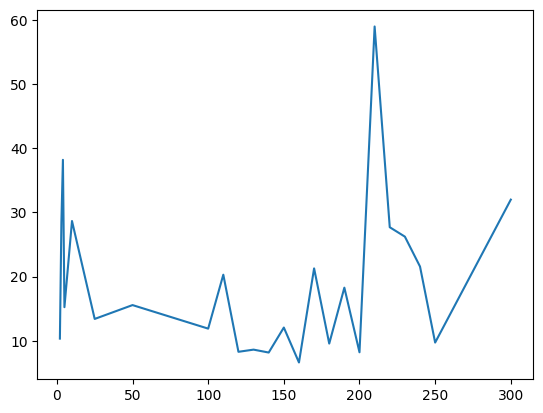

In [45]:
plt.plot(list(results.keys()),list(results.values()), label="List2 vs List1")

<BarContainer object of 24 artists>

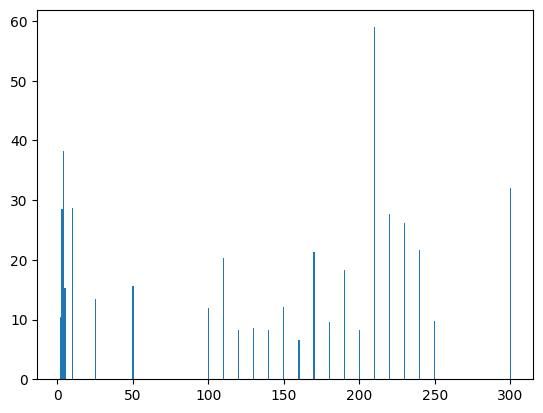

In [47]:
plt.bar(list(results.keys()),list(results.values()), label="List2 vs List1")

In [48]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))

In [49]:
sorted_dict

{160: 6.631422829858436,
 140: 8.178521588588461,
 200: 8.22016513814111,
 120: 8.294112012473464,
 130: 8.632505085943691,
 180: 9.573760206627108,
 250: 9.732520610947413,
 2: 10.348080034823735,
 100: 11.903099222398163,
 150: 12.071490368246886,
 25: 13.411408947683746,
 5: 15.2412754877977,
 50: 15.568420932022086,
 190: 18.28116799173099,
 110: 20.299758181111624,
 170: 21.284471181493792,
 240: 21.569604534313708,
 230: 26.226338138303124,
 220: 27.691333497607758,
 3: 28.52578239437083,
 10: 28.658381762716342,
 300: 31.990069278636053,
 4: 38.18681505815459,
 210: 58.95290519014282}

In [51]:
results={}
for i in [160,120,250,100,150,25,5,4,3,2]:
    rmse=fun(moving_avg_len,NAV,epoch=5)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0010
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7571e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2730e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0510e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0126e-04


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lenth of moving avrage 160 	RMSE 16.979226206871257
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0014
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4549e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9459e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5488e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.5497e-05


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 120 	RMSE 7.510895543514774
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0019
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4899e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1934e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.6880e-05
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0005e-04


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 250 	RMSE 14.4077354813757
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0015
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5375e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3426e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0530e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.4634e-05


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 100 	RMSE 7.337324427671554
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.4649e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2695e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1657e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.6174e-05


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 150 	RMSE 11.219751686789992
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0196e-04
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5355e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1918e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5589e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1747e-04


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 25 	RMSE 19.433233616318773
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0010
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6455e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9706e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.8890e-05
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1848e-04


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_69 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 5 	RMSE 8.399699492232093
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0018
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7029e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5092e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2188e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0207e-04


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 4 	RMSE 24.332150438379124
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3189e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1127e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0458e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0416e-04


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 3 	RMSE 34.9519928577019
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0011
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2875e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6350e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.8030e-05
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1044e-04


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Lenth of moving avrage 2 	RMSE 33.40371679071915


In [52]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))

In [53]:
sorted_dict

{100: 7.337324427671554,
 120: 7.510895543514774,
 5: 8.399699492232093,
 150: 11.219751686789992,
 250: 14.4077354813757,
 160: 16.979226206871257,
 25: 19.433233616318773,
 4: 24.332150438379124,
 2: 33.40371679071915,
 3: 34.9519928577019}

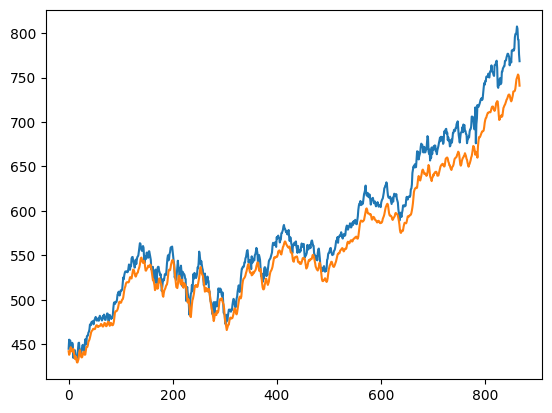

In [55]:
plt.plot(inv_y_test, label="List2 vs List1")
plt.plot(inv_predictions, label="List2 vs List1")inv_predictions[-5:]inv_y_test[-5:]

In [57]:
inv_y_test[-5:]

array([[805.0363],
       [793.0376],
       [792.7185],
       [776.0755],
       [768.4679]])

In [59]:
inv_predictions[-5:]inv_y_test[-5:]

array([[751.49396],
       [753.49133],
       [752.38965],
       [748.2133 ],
       [740.92554]], dtype=float32)

Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0011
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.4831e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.2267e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0247e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2910e-04


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_79 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[744.263  ]
 [745.47156]
 [743.1457 ]
 [739.95624]
 [732.51526]]
Lenth of moving avrage 5 	RMSE 21.913524799726062


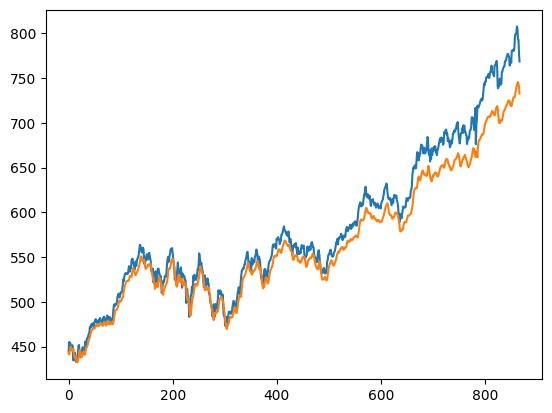

In [63]:
results={}
for i in [5]:
    rmse=fun(moving_avg_len,NAV,epoch=5, plot=True)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

In [62]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))
sorted_dict

{5: 31.327636390716005}

Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.4469e-04
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.4893e-04


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_81 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[768.2721 ]
 [770.4844 ]
 [769.00507]
 [764.2952 ]
 [756.12476]]
Lenth of moving avrage 5 	RMSE 20.28743271076027


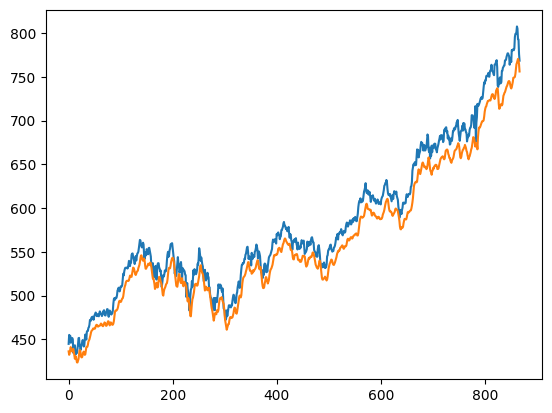

In [64]:
results={}
for i in [5]:
    rmse=fun(moving_avg_len,NAV,epoch=2, plot=True)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0011
Epoch 2/2
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5967e-04


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_83 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[769.7448 ]
 [771.89966]
 [770.3899 ]
 [765.7479 ]
 [757.64886]]
Lenth of moving avrage 100 	RMSE 18.270847744336923


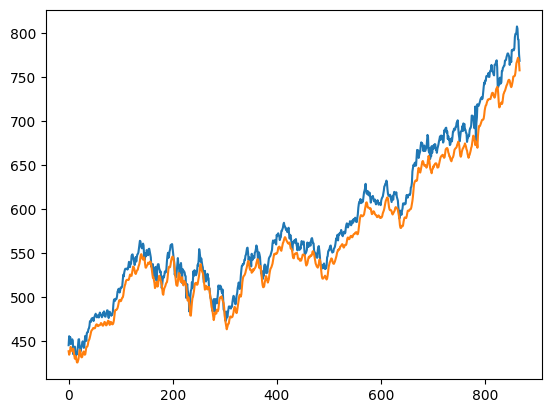

In [65]:
results={}
for i in [100]:
    rmse=fun(moving_avg_len,NAV,epoch=2, plot=True)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

In [66]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))
sorted_dict

{100: 18.270847744336923}

Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0010
Epoch 2/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.4845e-04
Epoch 3/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6014e-04
Epoch 4/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5019e-04
Epoch 5/5
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1572e-04


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_84 (LSTM)                  │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_85 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[749.13556]
 [750.35223]
 [747.3328 ]
 [743.8435 ]
 [734.70233]]
Lenth of moving avrage 100 	RMSE 31.628511168737028


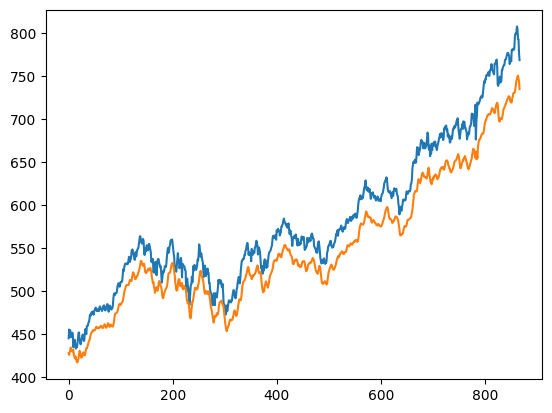

In [67]:
results={}
for i in [100]:
    rmse=fun(moving_avg_len,NAV,epoch=5, plot=True)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

In [68]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))
sorted_dict

{100: 31.628511168737028}

Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.2094e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6721e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7367e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.4412e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.6133e-05


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_88 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_89 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[818.93604]
 [816.76904]
 [805.7794 ]
 [806.8767 ]
 [791.4588 ]]
Lenth of moving avrage 2 	RMSE 8.837586645528626
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.9006e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2222e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3416e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.3771e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.6316e-05


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_90 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_91 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[770.2882]
 [766.9043]
 [754.6639]
 [756.9049]
 [740.7452]]
Lenth of moving avrage 3 	RMSE 19.26793901406597
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0011
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2581e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2662e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5090e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.6841e-05


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_92 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[768.5896]
 [766.3689]
 [756.5101]
 [757.7986]
 [743.8465]]
Lenth of moving avrage 4 	RMSE 17.215358757398594
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.1150e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8759e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7496e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1286e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.2797e-05


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_94 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_95 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[775.5631 ]
 [773.86255]
 [763.7454 ]
 [764.37305]
 [750.82074]]
Lenth of moving avrage 5 	RMSE 21.55678440577861
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.1987e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9489e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0479e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0333e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.1197e-05


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_96 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_97 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[799.1766 ]
 [796.9147 ]
 [786.38574]
 [787.23517]
 [772.5619 ]]
Lenth of moving avrage 6 	RMSE 7.886595145424157
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6.4034e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9661e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5094e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.1393e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.7533e-05


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_98 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_99 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[821.95935]
 [819.6367 ]
 [808.07416]
 [808.9915 ]
 [793.68195]]
Lenth of moving avrage 7 	RMSE 15.038821501213954
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.5013e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.2092e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5142e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.8158e-05


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_100 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_101 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[784.7638 ]
 [780.85077]
 [768.97186]
 [772.2087 ]
 [755.29004]]
Lenth of moving avrage 8 	RMSE 9.22054089698572
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7961e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6688e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0694e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.4570e-05


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_102 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_103 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[759.44385]
 [757.52124]
 [746.8668 ]
 [747.15564]
 [733.4453 ]]
Lenth of moving avrage 9 	RMSE 26.341644625933043
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.4528e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4044e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1549e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0922e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.2684e-05


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_104 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_105 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[769.66705]
 [766.74   ]
 [756.0474 ]
 [758.27014]
 [743.2485 ]]
Lenth of moving avrage 10 	RMSE 15.863508269459059
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.8154e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0647e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6886e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.5322e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.2023e-05


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_106 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_107 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[798.8341 ]
 [795.9888 ]
 [783.39777]
 [784.4608 ]
 [768.427  ]]
Lenth of moving avrage 11 	RMSE 5.928746610333772
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4203e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4186e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.8675e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.3463e-05


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_108 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_109 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[779.7857 ]
 [777.0424 ]
 [765.8376 ]
 [767.48114]
 [752.08484]]
Lenth of moving avrage 12 	RMSE 13.492739659476157
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.9046e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6220e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.8471e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0231e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.5637e-05


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_110 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_111 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[792.0126]
 [790.04  ]
 [779.1837]
 [779.967 ]
 [765.6684]]
Lenth of moving avrage 13 	RMSE 9.309829765509603
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.0810e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1191e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4823e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.5722e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.7907e-05


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_112 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_113 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[802.3846 ]
 [799.55457]
 [788.18774]
 [790.2743 ]
 [774.59753]]
Lenth of moving avrage 14 	RMSE 5.86652647676382
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.8225e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7234e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5485e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.0705e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0172e-04


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_114 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_115 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[781.3675 ]
 [778.03357]
 [766.45605]
 [769.01733]
 [753.0343 ]]
Lenth of moving avrage 15 	RMSE 10.346024897427244
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.9808e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3273e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6433e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.9033e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.5386e-05


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_116 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_117 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[824.1061 ]
 [822.5422 ]
 [810.54285]
 [808.8545 ]
 [793.57605]]
Lenth of moving avrage 16 	RMSE 14.13755899679668
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.7147e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7691e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.1334e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.4646e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.3940e-05


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_118 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_119 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[766.6029 ]
 [764.068  ]
 [753.2182 ]
 [754.88983]
 [740.31824]]
Lenth of moving avrage 17 	RMSE 22.828987149616474
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.1538e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6925e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1606e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.4785e-05


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_120 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_121 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[792.89655]
 [790.4389 ]
 [779.5455 ]
 [780.35736]
 [765.1674 ]]
Lenth of moving avrage 18 	RMSE 6.563221416918132
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0011
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.1387e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2645e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3288e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.1028e-05


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_122 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_123 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[843.54205]
 [842.2587 ]
 [831.6621 ]
 [831.7878 ]
 [817.31604]]
Lenth of moving avrage 19 	RMSE 20.63515575677662
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.9076e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7845e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2119e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0970e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.1091e-05


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_124 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_125 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[806.3241 ]
 [802.9774 ]
 [792.76825]
 [795.8808 ]
 [778.5276 ]]
Lenth of moving avrage 20 	RMSE 6.86365247756674
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.8890e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6421e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2202e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.2632e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0823e-05


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_126 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_127 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[812.8811 ]
 [810.30237]
 [800.0874 ]
 [802.0634 ]
 [786.45514]]
Lenth of moving avrage 21 	RMSE 12.213324536585233
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8.9675e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5871e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2216e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1012e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0708e-04


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_128 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_129 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[805.52905]
 [802.8878 ]
 [790.799  ]
 [791.82825]
 [775.7372 ]]
Lenth of moving avrage 22 	RMSE 5.19189832196001
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0015
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.7497e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.4309e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.6705e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.8890e-05


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_130 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_131 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[791.5851 ]
 [790.2547 ]
 [780.02814]
 [779.1837 ]
 [766.19836]]
Lenth of moving avrage 23 	RMSE 6.298219643084398
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.8463e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.0912e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3439e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.6737e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.8120e-05


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_132 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_133 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[777.6912 ]
 [773.1266 ]
 [760.51483]
 [764.43115]
 [745.1507 ]]
Lenth of moving avrage 24 	RMSE 18.007892258523572
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.2480e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0175e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2691e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3609e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.9466e-05


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_134 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_135 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[780.57245]
 [777.27893]
 [765.19214]
 [768.64636]
 [753.6431 ]]
Lenth of moving avrage 25 	RMSE 10.967329082930894
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.6731e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7697e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2518e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3766e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.2400e-05


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_136 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_137 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[767.30865]
 [763.7866 ]
 [753.69794]
 [757.0691 ]
 [741.06213]]
Lenth of moving avrage 26 	RMSE 13.951648350300612
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.0089e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5112e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3954e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1083e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.8293e-05


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_138 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_139 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[820.6835 ]
 [818.4253 ]
 [807.0777 ]
 [807.4618 ]
 [791.84045]]
Lenth of moving avrage 27 	RMSE 13.553968795966796
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.8111e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.1771e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2913e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.3562e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.6093e-05


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_140 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_141 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[769.7494]
 [767.9763]
 [757.7833]
 [758.2997]
 [744.766 ]]
Lenth of moving avrage 28 	RMSE 21.989052431162577
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.4322e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7887e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5217e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1975e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.1823e-05


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_142 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_143 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[802.8672 ]
 [800.1716 ]
 [787.05475]
 [787.6942 ]
 [771.6535 ]]
Lenth of moving avrage 29 	RMSE 5.395686196332674
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.6322e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.3262e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.6145e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.5379e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1884e-04


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_145 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[766.46124]
 [763.08136]
 [752.0834 ]
 [754.6755 ]
 [738.3531 ]]
Lenth of moving avrage 30 	RMSE 19.64157492205801
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5209e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2091e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.6369e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.2390e-05


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_146 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_147 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[798.59875]
 [794.69824]
 [783.56226]
 [787.6988 ]
 [769.1816 ]]
Lenth of moving avrage 31 	RMSE 9.674606306543364
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.7511e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9834e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6156e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0082e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.9450e-05


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_148 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_149 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[794.7245]
 [792.2115]
 [781.0434]
 [782.1246]
 [766.4435]]
Lenth of moving avrage 32 	RMSE 8.399587278595709
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.8737e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8972e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5197e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.4040e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.4149e-05


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_150 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_151 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[787.6841 ]
 [784.62195]
 [772.93024]
 [774.86707]
 [759.22394]]
Lenth of moving avrage 33 	RMSE 7.7325036547525094
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.1914e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9607e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7345e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1603e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.0675e-05


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_152 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_153 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[805.43304]
 [802.8241 ]
 [791.2383 ]
 [792.2454 ]
 [776.8665 ]]
Lenth of moving avrage 34 	RMSE 10.047759055523068
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.8758e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4361e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8457e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.9674e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.3179e-05


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_154 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_155 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[801.9765 ]
 [799.19446]
 [787.99396]
 [789.8334 ]
 [773.6954 ]]
Lenth of moving avrage 35 	RMSE 5.563228162710455
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.2761e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.2083e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4329e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0611e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.8123e-05


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_156 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_157 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[806.4269]
 [803.6875]
 [791.756 ]
 [793.3384]
 [777.6229]]
Lenth of moving avrage 36 	RMSE 7.424507326232316
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.6139e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5835e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.2422e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.7534e-05


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_158 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_159 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[792.05707]
 [788.77167]
 [777.4305 ]
 [779.8893 ]
 [763.3018 ]]
Lenth of moving avrage 37 	RMSE 6.78113220922324
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 9.0991e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.9992e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.2487e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0850e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.4304e-05


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_160 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_161 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[780.84283]
 [778.4217 ]
 [767.3348 ]
 [768.37054]
 [753.3896 ]]
Lenth of moving avrage 38 	RMSE 15.190961494830749
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0011
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.4087e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3819e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.1702e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1371e-04


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_162 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_163 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[810.1158 ]
 [807.6322 ]
 [796.1294 ]
 [797.24927]
 [781.7891 ]]
Lenth of moving avrage 39 	RMSE 9.644358767575003
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.5174e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6008e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.9149e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.7008e-05


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_164 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_165 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[799.7408 ]
 [796.028  ]
 [784.71136]
 [788.16003]
 [770.25525]]
Lenth of moving avrage 40 	RMSE 5.665353977182696
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 9.4304e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.7560e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.5904e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5905e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0701e-04


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_166 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_167 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[791.37744]
 [789.50616]
 [777.3976 ]
 [776.65393]
 [761.8537 ]]
Lenth of moving avrage 41 	RMSE 9.34588978472467
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.9985e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.8276e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1248e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0476e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.6091e-05


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_168 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_169 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[819.06586]
 [815.7463 ]
 [804.0789 ]
 [806.6152 ]
 [789.4554 ]]
Lenth of moving avrage 42 	RMSE 14.011816529865754
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.0258e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3696e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.4797e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0347e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.8819e-05


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_170 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_171 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[796.46704]
 [794.43176]
 [783.56726]
 [784.00476]
 [769.1886 ]]
Lenth of moving avrage 43 	RMSE 7.087599706196848
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.8029e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.4556e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.6392e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9027e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.6131e-05


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_172 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_173 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[789.7015 ]
 [786.0026 ]
 [774.2739 ]
 [776.9081 ]
 [760.21814]]
Lenth of moving avrage 44 	RMSE 9.42330127195532
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 9.1517e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5975e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1729e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0534e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.4861e-05


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_174 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_175 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[807.3175 ]
 [804.4315 ]
 [792.79944]
 [794.67346]
 [778.8353 ]]
Lenth of moving avrage 45 	RMSE 8.447246102429864
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.2604e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6672e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2194e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2521e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.6487e-05


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_176 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_177 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[781.14044]
 [777.8953 ]
 [766.63983]
 [768.81604]
 [752.58875]]
Lenth of moving avrage 46 	RMSE 10.881096557242138
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0434e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.4407e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2716e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.2279e-05


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_178 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_179 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[829.7104 ]
 [827.8593 ]
 [816.39154]
 [816.77716]
 [801.8985 ]]
Lenth of moving avrage 47 	RMSE 15.98331892941956
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0012
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9332e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3364e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.6998e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.7358e-05


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_180 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_181 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[766.8561 ]
 [764.8659 ]
 [754.91943]
 [755.77795]
 [742.4388 ]]
Lenth of moving avrage 48 	RMSE 16.903560089428403
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.2186e-04
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0672e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1050e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0986e-04
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.5629e-05


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_182 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_183 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[755.34454]
 [751.774  ]
 [740.6821 ]
 [743.4523 ]
 [726.86414]]
Lenth of moving avrage 49 	RMSE 28.395358473637888
Epoch 1/5


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0013
Epoch 2/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.2354e-04
Epoch 3/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4966e-04
Epoch 4/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.1828e-05
Epoch 5/5
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.7466e-05


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_184 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_185 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[787.9558 ]
 [785.76306]
 [774.55585]
 [775.08435]
 [760.2424 ]]
Lenth of moving avrage 50 	RMSE 10.977689786271924


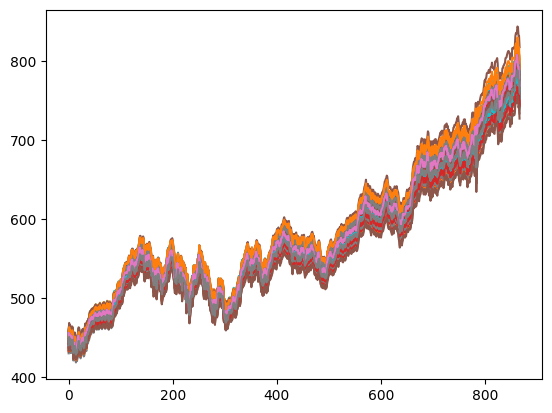

In [90]:
results={}
for i in [i for i in range(2,51)]:
    rmse=fun(moving_avg_len,NAV,epoch=5, plot=True)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

In [91]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))
sorted_dict

{22: 5.19189832196001,
 29: 5.395686196332674,
 35: 5.563228162710455,
 40: 5.665353977182696,
 14: 5.86652647676382,
 11: 5.928746610333772,
 23: 6.298219643084398,
 18: 6.563221416918132,
 37: 6.78113220922324,
 20: 6.86365247756674,
 43: 7.087599706196848,
 36: 7.424507326232316,
 33: 7.7325036547525094,
 6: 7.886595145424157,
 32: 8.399587278595709,
 45: 8.447246102429864,
 2: 8.837586645528626,
 8: 9.22054089698572,
 13: 9.309829765509603,
 41: 9.34588978472467,
 44: 9.42330127195532,
 39: 9.644358767575003,
 31: 9.674606306543364,
 34: 10.047759055523068,
 15: 10.346024897427244,
 46: 10.881096557242138,
 25: 10.967329082930894,
 50: 10.977689786271924,
 21: 12.213324536585233,
 12: 13.492739659476157,
 27: 13.553968795966796,
 26: 13.951648350300612,
 42: 14.011816529865754,
 16: 14.13755899679668,
 7: 15.038821501213954,
 38: 15.190961494830749,
 10: 15.863508269459059,
 47: 15.98331892941956,
 48: 16.903560089428403,
 4: 17.215358757398594,
 24: 18.007892258523572,
 3: 19.2679

Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.2220e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3291e-04


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_186 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_187 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[790.8442]
 [792.9165]
 [791.0839]
 [789.0905]
 [783.0736]]
Lenth of moving avrage 2 	RMSE 7.488850612799906
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.4838e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9561e-04


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_188 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_189 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[810.91534]
 [813.4114 ]
 [812.2143 ]
 [810.5258 ]
 [804.80865]]
Lenth of moving avrage 3 	RMSE 10.514691469281951
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0010
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9740e-04


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_190 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_191 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[764.3551 ]
 [766.44025]
 [764.77673]
 [762.81305]
 [757.0026 ]]
Lenth of moving avrage 4 	RMSE 20.68912993133782
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.4344e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5089e-04


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_192 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_193 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[786.27527]
 [788.60345]
 [787.6345 ]
 [786.0675 ]
 [780.92285]]
Lenth of moving avrage 5 	RMSE 8.189006854633071
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.6830e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7965e-04


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_194 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_195 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[784.68933]
 [786.76587]
 [785.15247]
 [783.36475]
 [777.6041 ]]
Lenth of moving avrage 6 	RMSE 8.469007014327033
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0215e-04


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_196 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_197 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[773.7291 ]
 [775.96136]
 [774.4535 ]
 [772.48285]
 [766.65344]]
Lenth of moving avrage 7 	RMSE 17.207763863353147
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.1974e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8872e-04


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_198 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_199 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[790.82874]
 [793.40234]
 [792.5849 ]
 [791.0507 ]
 [785.8099 ]]
Lenth of moving avrage 8 	RMSE 9.458275528474076
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.5030e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3613e-04


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_200 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_201 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[776.2921 ]
 [778.20636]
 [776.3849 ]
 [774.6063 ]
 [768.92194]]
Lenth of moving avrage 9 	RMSE 10.063264425119002
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.2727e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7863e-04


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_202 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_203 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[783.198 ]
 [785.3543]
 [783.9552]
 [782.2195]
 [776.7505]]
Lenth of moving avrage 10 	RMSE 8.566122228513308
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0019
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7370e-04


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_204 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_205 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[802.63837]
 [805.17206]
 [804.36945]
 [802.67267]
 [797.4352 ]]
Lenth of moving avrage 11 	RMSE 10.581478944707449
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8039e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8283e-04


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_206 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_207 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[822.20856]
 [824.43384]
 [821.6966 ]
 [819.3459 ]
 [811.79987]]
Lenth of moving avrage 12 	RMSE 10.417136634895172
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0038e-04


Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_208 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_209 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[755.38116]
 [757.38855]
 [756.424  ]
 [754.9677 ]
 [750.3219 ]]
Lenth of moving avrage 13 	RMSE 17.82942294552213
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.9360e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0847e-04


Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_210 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_211 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[761.353  ]
 [763.4201 ]
 [762.16156]
 [760.58923]
 [755.4473 ]]
Lenth of moving avrage 14 	RMSE 17.579156912340093
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.6036e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0140e-04


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_212 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_213 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[793.1479 ]
 [795.2004 ]
 [793.0016 ]
 [790.94165]
 [784.42786]]
Lenth of moving avrage 15 	RMSE 7.170706247172937
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8386e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8110e-04


Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_214 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_215 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[774.54254]
 [776.3506 ]
 [775.03864]
 [773.77606]
 [768.8241 ]]
Lenth of moving avrage 16 	RMSE 12.744429522695139
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1897e-04


Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_216 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_217 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[776.092  ]
 [778.13916]
 [776.53656]
 [774.58154]
 [768.9342 ]]
Lenth of moving avrage 17 	RMSE 11.381994264750254
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8073e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4431e-04


Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_218 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_219 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[779.2379]
 [780.8127]
 [777.7436]
 [775.8443]
 [768.7682]]
Lenth of moving avrage 18 	RMSE 11.431759318840871
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.4007e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6877e-04


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_220 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_221 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[791.8492 ]
 [793.9146 ]
 [792.2999 ]
 [790.61365]
 [784.9287 ]]
Lenth of moving avrage 19 	RMSE 8.723059707059619
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.9655e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.0600e-04


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_222 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_223 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[736.24854]
 [738.1323 ]
 [736.6692 ]
 [734.97424]
 [729.7514 ]]
Lenth of moving avrage 20 	RMSE 34.1192982876427
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.1161e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8828e-04


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_224 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_225 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[748.6101 ]
 [750.4779 ]
 [748.33673]
 [746.402  ]
 [740.2805 ]]
Lenth of moving avrage 21 	RMSE 32.1674751122746
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.0124e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9319e-04


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_226 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_227 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[778.5093 ]
 [780.59174]
 [778.84845]
 [776.9458 ]
 [771.0355 ]]
Lenth of moving avrage 22 	RMSE 12.919973987277697
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.2347e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6906e-04


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_228 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_229 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[813.53125]
 [815.7337 ]
 [814.19904]
 [812.372  ]
 [806.56665]]
Lenth of moving avrage 23 	RMSE 17.59798288656483
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.6251e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3512e-04


Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_230 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_231 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[741.6128 ]
 [743.28235]
 [741.0517 ]
 [739.18787]
 [733.2507 ]]
Lenth of moving avrage 24 	RMSE 33.078687309033235
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1708e-04


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_232 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_233 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[767.17773]
 [769.2439 ]
 [768.1898 ]
 [766.7783 ]
 [761.96405]]
Lenth of moving avrage 25 	RMSE 12.741825674311654
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7456e-04


Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_234 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_235 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_234 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_235 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[794.03705]
 [796.1786 ]
 [794.68555]
 [792.88727]
 [787.2816 ]]
Lenth of moving avrage 26 	RMSE 9.463822876611584
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0017
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8193e-04


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_236 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_237 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_236 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[809.34344]
 [811.85486]
 [810.91797]
 [809.2414 ]
 [803.93066]]
Lenth of moving avrage 27 	RMSE 14.290347047088268
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0018
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0789e-04


Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_238 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_239 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[771.32245]
 [773.7079 ]
 [773.0194 ]
 [771.4339 ]
 [766.6187 ]]
Lenth of moving avrage 28 	RMSE 13.93436337129636
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.2631e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7663e-04


Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_240 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_241 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_240 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[772.769  ]
 [774.8681 ]
 [773.5298 ]
 [771.76953]
 [766.4772 ]]
Lenth of moving avrage 29 	RMSE 12.720855361273783
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0706e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2837e-04


Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_242 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_243 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[802.1233 ]
 [804.5899 ]
 [803.61096]
 [802.0451 ]
 [796.70026]]
Lenth of moving avrage 30 	RMSE 8.82711961144217
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0011
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8172e-04


Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_244 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_245 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_244 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_245 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[744.9282 ]
 [746.9778 ]
 [745.7046 ]
 [744.1893 ]
 [739.06683]]
Lenth of moving avrage 31 	RMSE 31.358779144623902
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0685e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0110e-04


Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_246 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_247 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_246 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_247 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[622.1089 ]
 [623.5232 ]
 [622.55145]
 [621.4388 ]
 [617.7447 ]]
Lenth of moving avrage 32 	RMSE 102.66632611507274
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.0780e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9791e-04


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_248 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_249 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[753.41724]
 [755.4849 ]
 [754.5579 ]
 [753.2477 ]
 [748.59344]]
Lenth of moving avrage 33 	RMSE 21.7540036802431
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.6710e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9429e-04


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_250 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_251 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[801.79193]
 [803.6744 ]
 [801.12854]
 [799.34955]
 [792.65497]]
Lenth of moving avrage 34 	RMSE 10.182180872710752
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.1773e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4329e-04


Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_252 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_253 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[794.25867]
 [796.6366 ]
 [795.5141 ]
 [793.89294]
 [788.46533]]
Lenth of moving avrage 35 	RMSE 7.860393786289007
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.3380e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6486e-04


Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_254 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_255 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[717.3067 ]
 [719.056  ]
 [716.9509 ]
 [715.01056]
 [709.16   ]]
Lenth of moving avrage 36 	RMSE 52.089886157336515
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.5203e-04


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_256 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_257 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[794.69086]
 [797.17096]
 [796.6243 ]
 [795.192  ]
 [790.42084]]
Lenth of moving avrage 37 	RMSE 9.94052127860686
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.9646e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9373e-04


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_258 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_259 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_258 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[766.46124]
 [768.407  ]
 [766.8589 ]
 [765.354  ]
 [759.9051 ]]
Lenth of moving avrage 38 	RMSE 15.818651613147257
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.8647e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0780e-04


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_260 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_261 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[791.7852 ]
 [794.00806]
 [792.5439 ]
 [790.7059 ]
 [784.9646 ]]
Lenth of moving avrage 39 	RMSE 7.523308760330681
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.6623e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0235e-04


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_262 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_263 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[786.0758 ]
 [788.4598 ]
 [787.29553]
 [785.58954]
 [780.0426 ]]
Lenth of moving avrage 40 	RMSE 12.547609194866068
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.4404e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9492e-04


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_264 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_265 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_264 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_265 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[796.2123 ]
 [798.41034]
 [796.7313 ]
 [794.90936]
 [788.92975]]
Lenth of moving avrage 41 	RMSE 7.062468171452204
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4710e-04


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_266 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_267 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_266 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_267 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[764.10645]
 [766.18097]
 [765.17145]
 [763.76245]
 [758.93256]]
Lenth of moving avrage 42 	RMSE 15.495693817585009
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.0948e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0790e-04


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_268 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_269 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_268 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_269 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[836.78436]
 [839.15656]
 [837.0748 ]
 [835.0654 ]
 [828.257  ]]
Lenth of moving avrage 43 	RMSE 23.772346184455714
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0160e-04


Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_270 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_271 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_270 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_271 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[711.11554]
 [712.69586]
 [711.1329 ]
 [709.57324]
 [704.6375 ]]
Lenth of moving avrage 44 	RMSE 46.02498095864771
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.2201e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0449e-04


Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_272 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_273 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_272 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_273 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[774.15173]
 [776.13257]
 [774.11584]
 [772.28076]
 [766.2565 ]]
Lenth of moving avrage 45 	RMSE 14.221132251241395
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.4221e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8177e-04


Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_274 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_275 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_275 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[720.87103]
 [722.6421 ]
 [721.55426]
 [720.1917 ]
 [715.6702 ]]
Lenth of moving avrage 46 	RMSE 38.371726354495365
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0014
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2240e-04


Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_276 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_277 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_276 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_277 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[763.505  ]
 [765.7018 ]
 [764.62305]
 [763.02313]
 [757.95184]]
Lenth of moving avrage 47 	RMSE 18.756618732745032
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.0381e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9821e-04


Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_278 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_279 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_278 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_279 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[760.51385]
 [762.6398 ]
 [761.3603 ]
 [759.6995 ]
 [754.48376]]
Lenth of moving avrage 48 	RMSE 21.319465881911345
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.1800e-04
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6948e-04


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_280 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_281 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_280 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_281 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[695.5708 ]
 [696.93976]
 [694.27075]
 [692.4957 ]
 [686.43726]]
Lenth of moving avrage 49 	RMSE 62.85434854265031
Epoch 1/2


/home/kishan/KishanDasondhi/Code/mutual-fund-trend-analysis/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2020/2020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0010
Epoch 2/2
2020/2020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8889e-04


Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_282 (LSTM)                 │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_283 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_282 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_283 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test
[[805.0363]
 [793.0376]
 [792.7185]
 [776.0755]
 [768.4679]]
Pred
[[756.0075 ]
 [758.1737 ]
 [757.0126 ]
 [755.35065]
 [750.2135 ]]
Lenth of moving avrage 50 	RMSE 23.576752445220627


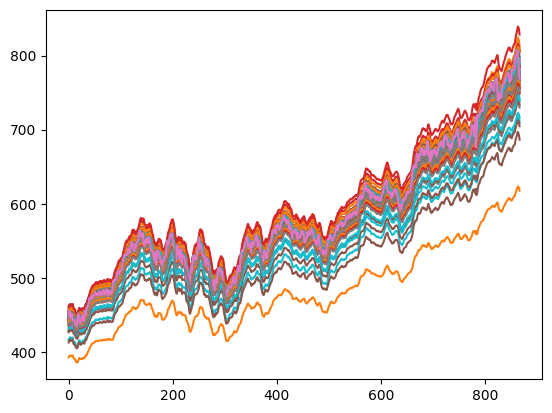

In [92]:
results={}
for i in [i for i in range(2,51)]:
    rmse=fun(moving_avg_len,NAV,epoch=2, plot=True)
    results[i]=rmse
    print(f"Lenth of moving avrage {i} \tRMSE {rmse}")

In [93]:
sorted_dict = dict(sorted(results.items(), key=lambda item: item[1]))
sorted_dict

{41: 7.062468171452204,
 15: 7.170706247172937,
 2: 7.488850612799906,
 39: 7.523308760330681,
 35: 7.860393786289007,
 5: 8.189006854633071,
 6: 8.469007014327033,
 10: 8.566122228513308,
 19: 8.723059707059619,
 30: 8.82711961144217,
 8: 9.458275528474076,
 26: 9.463822876611584,
 37: 9.94052127860686,
 9: 10.063264425119002,
 34: 10.182180872710752,
 12: 10.417136634895172,
 3: 10.514691469281951,
 11: 10.581478944707449,
 17: 11.381994264750254,
 18: 11.431759318840871,
 40: 12.547609194866068,
 29: 12.720855361273783,
 25: 12.741825674311654,
 16: 12.744429522695139,
 22: 12.919973987277697,
 28: 13.93436337129636,
 45: 14.221132251241395,
 27: 14.290347047088268,
 42: 15.495693817585009,
 38: 15.818651613147257,
 7: 17.207763863353147,
 14: 17.579156912340093,
 23: 17.59798288656483,
 13: 17.82942294552213,
 47: 18.756618732745032,
 4: 20.68912993133782,
 48: 21.319465881911345,
 33: 21.7540036802431,
 50: 23.576752445220627,
 43: 23.772346184455714,
 31: 31.358779144623902,
 21: